# Handwritten Digit Recognition (MNIST) using PyTorch
Train a simple neural network to classify handwritten digits (0–9) from the MNIST dataset.

## Step 1: Import Libraries
Import PyTorch, torchvision for datasets, and Matplotlib for visualization.

In [1]:
# Import libraries
import torch                                 # Core PyTorch library
import torch.nn as nn                        # Neural Network module
import torch.optim as optim                  # Optimization algorithms (Adam)
from torchvision import datasets, transforms # Tools for image datasets and preprocessing
import numpy as np                           # Numerical operations
import matplotlib.pyplot as plt              # Data visualization

## Step 2: Load and Normalize the MNIST Dataset
Download the dataset and normalize pixel values to the range [-1, 1].

In [2]:
# Tranform: converts images to tensors and normalizes
transform = transforms.Compose([
    transforms.ToTensor(),               # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,)) # Normalize pixel values to [-1, 1] for faster learning
])

# Load training and test data
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoaders for batching
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True) # Shuffle improves generalization
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False) # No shuffle needed for evaluation

## Step 3: Visualize the Data
Display a few sample images from the MNIST dataset to confirm the data loaded correctly.

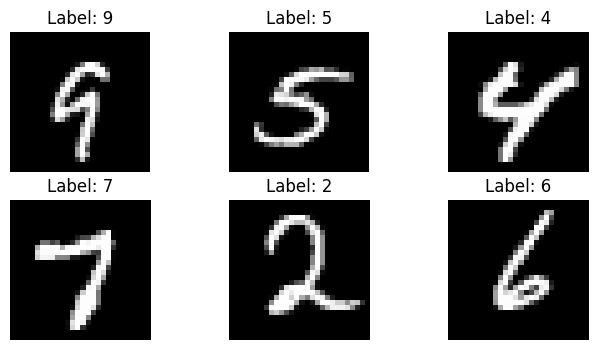

In [3]:
# Get a batch of training images and labels
images, labels = next(iter(train_loader))

# Set up a figure to display multiple images
plt.figure(figsize=(8, 4))

# Loop through the first 6 images in the batch
for i in range(6):
    plt.subplot(2, 3, i + 1)                     # Create a 2x3 grid of subplots
    plt.imshow(images[i].squeeze(), cmap='gray') # Display image in grayscale
    plt.title(f"Label: {labels[i].item()}")      # Show true label as the title
    plt.axis('off')                              # Hide axes for a cleaner look

# Render the figure
plt.show()

## Step 4: Define the Neural Network
Create a simple feedforward neural network with one hidden layer to classify digits 0-9.

In [4]:
# Define a simple feedforward neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) # Fully connected hidden layer with 128 neurons
        self.fc2 = nn.Linear(128, 10)      # Output layer with 10 neurons (one for each digit)

    def forward(self, x):
        x = x.view(-1, 28 * 28)            # Flatten 28 image tensors into 1D vectors
        x = torch.relu(self.fc1(x))        # Apply ReLU activation to hidden layers
        x = self.fc2(x)                    # Output logits for each class
        return x

# Instantiate the model
model = SimpleNN()
print(model) # Print model achitecture summary

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## Step 5: Define Loss Function and Optimizer
Use CrossEntropyLoss to measure prediction error and the Adam optimizer to update model weights.

In [5]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()                    # Loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer to update weights efficiently

## Step 6: Train the Model
Train the model for several epochs so it can learn to recognize patterns in the handwritten digits.

In [6]:
# Training loop
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()             # Reset gradients before processing this batch
        outputs = model(images)           # Forward pass: compute model predictions
        loss = criterion(outputs, labels) # Compute loss comparing predictions to true labels
        loss.backward()                   # Backpropagate the loss to compute gradients
        optimizer.step()                  # Update model weights using gradients
        running_loss += loss.item()       # Accumulate loss to track progress over the epoch

    # Print average loss for this epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/5], Loss: 0.3841
Epoch [2/5], Loss: 0.1989
Epoch [3/5], Loss: 0.1429
Epoch [4/5], Loss: 0.1146
Epoch [5/5], Loss: 0.0947


## Step 7: Evaluate Model Accuracy
Test the trained model on unseen data to measure how accurately it predicts digit labels.

In [7]:
# Evaluate the model on the test dataset
correct = 0
total = 0

with torch.no_grad(): # Disable gradient calculation for faster evaluation
    for images, labels in test_loader:
        outputs = model(images)                       # Forward pass: compute predictions
        _, predicted = torch.max(outputs, 1)          # Get the class with the highest score
        total += labels.size(0)                       # Count total number of images
        correct += (predicted == labels).sum().item() # Count correct predictions

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 96.67%


## Step 8: Visualize Predictions
Display a few test images alongside the model's predicted and true labels to see how well it performs visually.

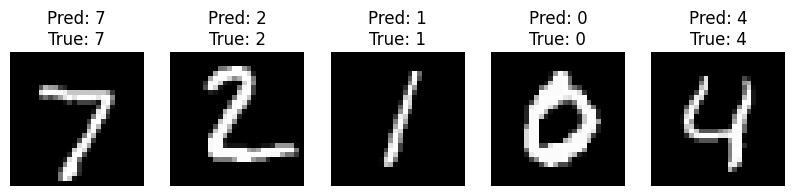

In [8]:
# Visualize predictions on a batch of test images
images, labels = next(iter(test_loader)) # Get a batch of test images and labels
outputs = model(images)                  # Forward pass: compute predictions
_, predicted = torch.max(outputs, 1)     # Select class with highest score as prediction

# Set up a figure to display multiple images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)                       # Create a 1x5 grid of subplots
    plt.imshow(images[i].squeeze(), cmap='gray') # Display image in grayscale
    plt.title(f"Pred: {predicted[i].item()}\nTrue: {labels[i].item()}") # Show predicted vs true label
    plt.axis('off')                              # Hide axes for a cleaner look

plt.show() # Render the figure

## Step 10: Save the Model
Save the trained model to a file so it can be reloaded later without retraining.

In [9]:
# Save the trained model's parameters to a file for later use
torch.save(model.state_dict(), 'mnist_model.pth')